In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.ndimage import imread, generic_filter
from scipy.misc import imresize
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [52]:
img = imresize(imread('./moles.jpg'), 20)
(x,y,c) = img.shape
points = img.reshape(x * y, c)
mat = np.mat(points)

In [53]:
mat[:,0].shape

(11232, 1)

/usr/local/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


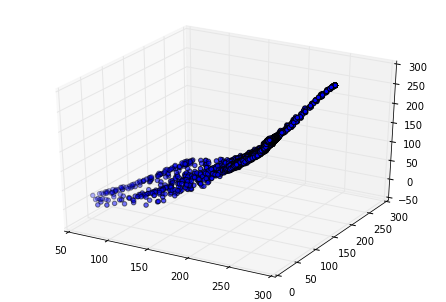

In [54]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.array(mat[:,0]), np.array(mat[:,1]), np.array(mat[:,2]))
fig.show()

In [55]:
model = KMeans(n_clusters=2)
model.fit(mat)
labels = model.labels_

# ensure that 0 is the label for bright points
(center0, center1) = model.cluster_centers_
def average_brightness(values):
    return np.mean(values)

def switch_labels(labels):
    return np.array([1 - label for label in labels])

if (average_brightness(center0) < average_brightness(center1)):
    labels = switch_labels(labels)

/usr/local/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


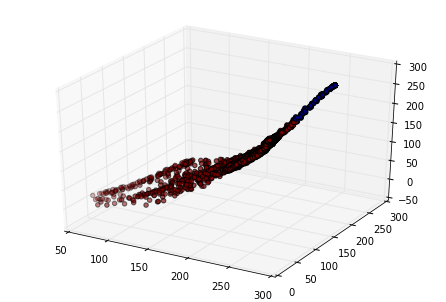

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.array(mat[:,0]), np.array(mat[:,1]), np.array(mat[:,2]), c=labels.astype(np.float))
fig.show()

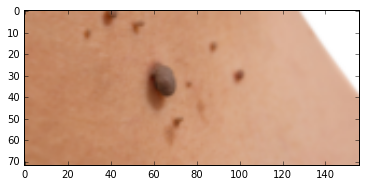

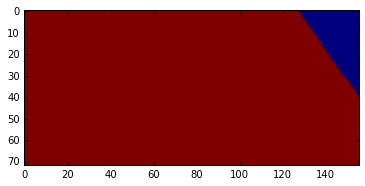

In [57]:
labeled_img = labels.reshape(x, y)
plt.imshow(img)
plt.show()
plt.imshow(labeled_img)

In [58]:
labeled_img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

(0, 71, 155, 0)


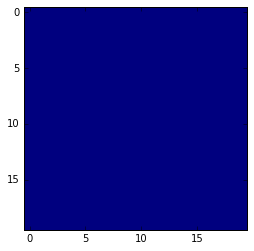

In [59]:
min_neighbour_count = 3
def clean_image(labeled_img):
    footprint = np.array([[1,1,1],
                          [1,1,1],
                          [1,1,1]])
    def get_new_value(values):
        value = values[4]
        if (values.sum() - value) < min_neighbour_count:
            return 0
        else:
            return value
        
    
    return generic_filter(labeled_img, get_new_value, footprint=footprint)
    
margin = 20
def get_bounding_rect(labeled_img):
    cleaned_labeled_img = clean_image(labeled_img)
    left = labeled_img.shape[0]
    right = 0
    top = labeled_img.shape[1]
    bottom = 0
    
    for ix, row in enumerate(cleaned_labeled_img):
        for iy, value in enumerate(row):
            if value == 1:
                if ix < left:
                    left = ix
                if right < ix:
                    right = ix
                if iy < top:
                    top = iy
                if bottom < iy:
                    bottom = iy
    
    print((top, right, bottom, left))
    return labeled_img[left-margin:right+margin,top-margin:bottom+margin]

cropped_img = get_bounding_rect(labeled_img)
plt.imshow(cropped_img)
    
    